# Import modules and dataset

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston = datasets.load_boston()

# Exploring dataset
print(boston["data"].shape)
print(boston.keys())

# Rearrange dataset
df1 = pd.DataFrame(boston["data"], columns = boston['feature_names'])
df2 = pd.DataFrame(boston["target"], columns = np.array(["MEDV"]))
df = pd.concat([df1.reset_index(drop=True), df2], axis=1)
df.index = range(506)
print(df.head(5))

(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
X = df.drop("MEDV", axis = 1).to_numpy()
print(X.shape)
print(type(X))

(506, 13)
<class 'numpy.ndarray'>


In [5]:
y = df["MEDV"].values
print(y.shape)
print(type(y))

(506,)
<class 'numpy.ndarray'>


In [6]:
from sklearn.linear_model import LinearRegression

# Univariate Regression

In [7]:
X_1 = X[:, 5].reshape(-1,1)
from sklearn.model_selection import train_test_split
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y, test_size = 0.3, random_state=21)

In [8]:
reg = LinearRegression()
reg.fit(X_1train, y_1train)

LinearRegression()

In [9]:
y_1pred = reg.predict(X_1test)

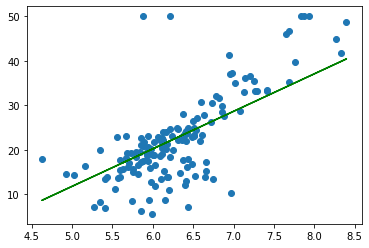

In [10]:
plt.scatter(X_1test, y_1test)
plt.plot(X_1test, y_1pred, color = "green")
plt.show()

# Multivariate Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

In [12]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)

In [14]:
np.sqrt(np.mean((y_pred-y_test)**2))

5.251575631213479

# Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cv_results = cross_val_score(reg, X_train, y_train, cv = 5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

[0.75933233 0.67962997 0.75392539 0.71546505 0.68723118]
Average 5-Fold CV Score: 0.7191167837675574


# Regularisation

## Performing Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state=42)

In [18]:
# Normalize 代表所有Column都會被normalised到相同的scale上進行迴歸分析
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train2, y_train2)

Ridge(alpha=0.1, normalize=True)

In [19]:
y_pred2 = ridge.predict(X_test2)
print(ridge.score(X_test2, y_test2))

0.6996938275127313


## Performing LASSO Regression

In [20]:
from sklearn.linear_model import Lasso
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.3, random_state=42)

In [21]:
# Normalize 代表所有Column都會被normalised到相同的scale上進行迴歸分析
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train3, y_train3)

Lasso(alpha=0.1, normalize=True)

In [22]:
y_pred3 = lasso.predict(X_test3)
print(lasso.score(X_test3, y_test3))

0.595022953532855


### Select Features using Lasso Regression

In [23]:
names = df.drop("MEDV", axis = 1).columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
lasso_features = Lasso(alpha = 0.1)
lasso_coef = lasso_features.fit(X, y).coef_
lasso_coef

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

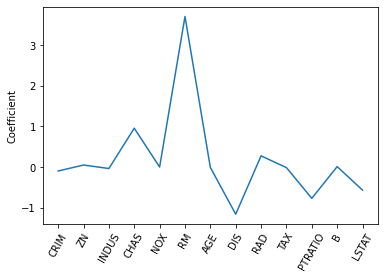

In [25]:
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel("Coefficient")
plt.show()

## Performing ElasticNet with Grid Search Cross Validation

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Setting Parameter Grid

In [27]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

### Build the model and find the best parameters

In [28]:
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

### Fit model to data

In [29]:
gm_cv.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3788.126876344884, tolerance: 2.309370607773851
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3647.6654717863075, tolerance: 2.3029837526501766
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3927.439893429483, tolerance: 2.3981318657243813
  positive)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3407.585563512693, tolerance: 2.1733624381625

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

### Prediction Evaluation

In [30]:
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6367704423056931
Tuned ElasticNet MSE: 34.733010823049376
